In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 1000

In [2]:
data = pd.read_csv('sales-data.csv',parse_dates=['barr_date'])
data = data[(data.region_name=="EMEA") & (data.business_area_name=="B00 - LTC")]
data.rename(columns={"barr_date":"date","revenue": "sales"}, inplace=True)
display(data.head())

data = data[['date','sales']]
data.reset_index(drop=True, inplace=True)
data.head()

,business_area_name,region_name,date,sales
64,B00 - LTC,EMEA,2017-01-01,1036118.90
73,B00 - LTC,EMEA,2017-02-01,1357113.33
113,B00 - LTC,EMEA,2017-03-01,1426584.89
137,B00 - LTC,EMEA,2017-04-01,1662861.96
148,B00 - LTC,EMEA,2017-05-01,1272770.45


,date,sales
0,2017-01-01,1036118.90
1,2017-02-01,1357113.33
2,2017-03-01,1426584.89
3,2017-04-01,1662861.96
4,2017-05-01,1272770.45


In [3]:
data.shape

(60, 2)

<AxesSubplot:xlabel='Date', ylabel='Values'>

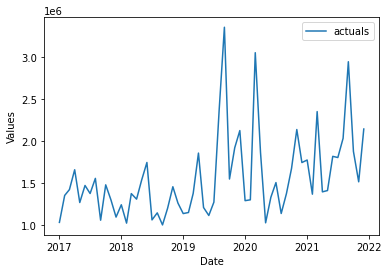

In [4]:
f = Forecaster(y=data['sales'],current_dates=data['date'])
f.plot()

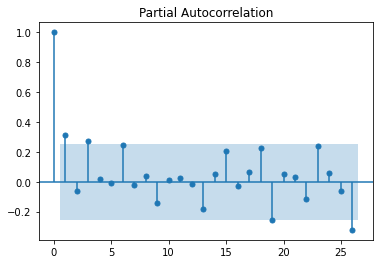

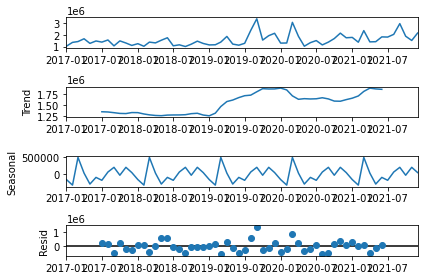

In [5]:
f.plot_pacf(lags=26)
plt.show()

f.seasonal_decompose().plot()
plt.show()

In [6]:
f.set_test_length(12)
f.generate_future_dates(12)
f.set_estimator('lstm')

Epoch 1/200
1/1 [==============================] - 69s 69s/step - loss: 0.3203 - val_loss: 0.3166
Epoch 2/200
1/1 [==============================] - 0s 292ms/step - loss: 0.3107 - val_loss: 0.2999
Epoch 3/200
1/1 [==============================] - 0s 300ms/step - loss: 0.2966 - val_loss: 0.2709
Epoch 4/200
1/1 [==============================] - 0s 295ms/step - loss: 0.2711 - val_loss: 0.2398
Epoch 5/200
1/1 [==============================] - 0s 282ms/step - loss: 0.2328 - val_loss: 0.2440
Epoch 6/200
1/1 [==============================] - 0s 264ms/step - loss: 0.2280 - val_loss: 0.2460
Epoch 7/200
1/1 [==============================] - 0s 297ms/step - loss: 0.2214 - val_loss: 0.2398
Epoch 8/200
1/1 [==============================] - 0s 183ms/step - loss: 0.2040 - val_loss: 0.2393
Epoch 9/200
1/1 [==============================] - 0s 173ms/step - loss: 0.2031 - val_loss: 0.2437
Epoch 10/200
1/1 [==============================] - 0s 148ms/step - loss: 0.2045 - val_loss: 0.2489
Epoch 11/2

1/1 [==============================] - 0s 269ms/step - loss: 0.1972 - val_loss: 0.2556
Epoch 84/200
1/1 [==============================] - 0s 264ms/step - loss: 0.1969 - val_loss: 0.2572
Epoch 85/200
1/1 [==============================] - 0s 277ms/step - loss: 0.1969 - val_loss: 0.2573
Epoch 86/200
1/1 [==============================] - 0s 274ms/step - loss: 0.1967 - val_loss: 0.2555
Epoch 87/200
1/1 [==============================] - 0s 237ms/step - loss: 0.1972 - val_loss: 0.2557
Epoch 88/200
1/1 [==============================] - 0s 237ms/step - loss: 0.1970 - val_loss: 0.2577
Epoch 89/200
1/1 [==============================] - 0s 256ms/step - loss: 0.1970 - val_loss: 0.2583
Epoch 90/200
1/1 [==============================] - 0s 228ms/step - loss: 0.1971 - val_loss: 0.2576
Epoch 91/200
1/1 [==============================] - 0s 246ms/step - loss: 0.1969 - val_loss: 0.2570
Epoch 92/200
1/1 [==============================] - 0s 263ms/step - loss: 0.1970 - val_loss: 0.2573
Epoch 93/200


1/1 [==============================] - 0s 245ms/step - loss: 0.1970 - val_loss: 0.2566
Epoch 165/200
1/1 [==============================] - 0s 269ms/step - loss: 0.1969 - val_loss: 0.2585
Epoch 166/200
1/1 [==============================] - 0s 261ms/step - loss: 0.1968 - val_loss: 0.2589
Epoch 167/200
1/1 [==============================] - 0s 289ms/step - loss: 0.1968 - val_loss: 0.2573
Epoch 168/200
1/1 [==============================] - 0s 271ms/step - loss: 0.1970 - val_loss: 0.2577
Epoch 169/200
1/1 [==============================] - 0s 274ms/step - loss: 0.1967 - val_loss: 0.2583
Epoch 170/200
1/1 [==============================] - 0s 271ms/step - loss: 0.1969 - val_loss: 0.2567
Epoch 171/200
1/1 [==============================] - 0s 258ms/step - loss: 0.1967 - val_loss: 0.2545
Epoch 172/200
1/1 [==============================] - 0s 219ms/step - loss: 0.1971 - val_loss: 0.2545
Epoch 173/200
1/1 [==============================] - 0s 257ms/step - loss: 0.1969 - val_loss: 0.2565
Epoc

Epoch 46/200
2/2 [==============================] - 0s 250ms/step - loss: 0.1627 - val_loss: 0.2357
Epoch 47/200
2/2 [==============================] - 0s 233ms/step - loss: 0.1628 - val_loss: 0.2385
Epoch 48/200
2/2 [==============================] - 0s 227ms/step - loss: 0.1641 - val_loss: 0.2396
Epoch 49/200
2/2 [==============================] - 0s 224ms/step - loss: 0.1639 - val_loss: 0.2405
Epoch 50/200
2/2 [==============================] - 0s 226ms/step - loss: 0.1633 - val_loss: 0.2427
Epoch 51/200
2/2 [==============================] - 0s 252ms/step - loss: 0.1642 - val_loss: 0.2447
Epoch 52/200
2/2 [==============================] - 0s 262ms/step - loss: 0.1650 - val_loss: 0.2450
Epoch 53/200
2/2 [==============================] - 0s 249ms/step - loss: 0.1642 - val_loss: 0.2458
Epoch 54/200
2/2 [==============================] - 0s 260ms/step - loss: 0.1625 - val_loss: 0.2471
Epoch 55/200
2/2 [==============================] - 0s 265ms/step - loss: 0.1629 - val_loss: 0.2475


2/2 [==============================] - 1s 294ms/step - loss: 0.1630 - val_loss: 0.2378
Epoch 128/200
2/2 [==============================] - 1s 291ms/step - loss: 0.1617 - val_loss: 0.2382
Epoch 129/200
2/2 [==============================] - 1s 291ms/step - loss: 0.1613 - val_loss: 0.2388
Epoch 130/200
2/2 [==============================] - 1s 291ms/step - loss: 0.1653 - val_loss: 0.2397
Epoch 131/200
2/2 [==============================] - 1s 296ms/step - loss: 0.1662 - val_loss: 0.2396
Epoch 132/200
2/2 [==============================] - 1s 276ms/step - loss: 0.1616 - val_loss: 0.2401
Epoch 133/200
2/2 [==============================] - 1s 290ms/step - loss: 0.1613 - val_loss: 0.2407
Epoch 134/200
2/2 [==============================] - 1s 281ms/step - loss: 0.1618 - val_loss: 0.2416
Epoch 135/200
2/2 [==============================] - 1s 274ms/step - loss: 0.1626 - val_loss: 0.2424
Epoch 136/200
2/2 [==============================] - 1s 295ms/step - loss: 0.1626 - val_loss: 0.2422
Epoc

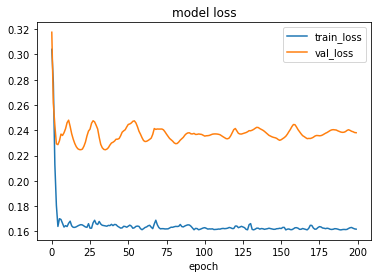

In [7]:
f.manual_forecast(call_me='lstm',
                  lags=24,
                  batch_size=16,
                  epochs=200,
                  validation_split=.20,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(100,)*15,
                  dropout=(0,)*15,
                  plot_loss=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

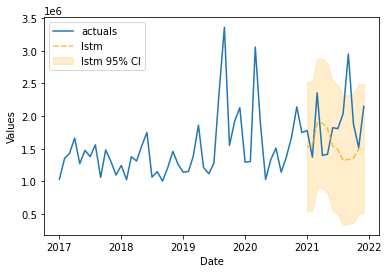

In [8]:
f.plot_test_set(ci=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

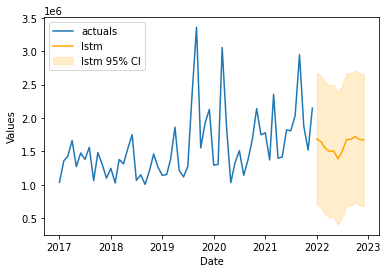

In [9]:
f.generate_future_dates(12)
f.add_time_trend()
f.export(to_excel=True,excel_name='results.xlsx')
f.plot(ci=True)

In [10]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,lstm,0.24,624904.33,-1.02,True


In [11]:
test_2021 = f.export_test_set_preds_with_cis('lstm')
display(test_2021.head(12))

predicted_2022 = f.export_forecasts_with_cis('lstm')
display(predicted_2022.head(12))

,DATE,UpperPreds,Preds,Actuals,LowerPreds,ModelNickname,CILevel
0,2021-01-01,2521391.30,1532152.70,1778949.66,542914.10,lstm,0.95
1,2021-02-01,2536427.73,1547189.13,1372050.40,557950.53,lstm,0.95
2,2021-03-01,2881989.90,1892751.30,2355621.17,903512.70,lstm,0.95
3,2021-04-01,2881082.10,1891843.50,1399671.88,902604.90,lstm,0.95
4,2021-05-01,2800338.78,1811100.18,1415348.38,821861.58,lstm,0.95
5,2021-06-01,2532498.11,1543259.51,1822555.97,554020.91,lstm,0.95
6,2021-07-01,2476056.54,1486817.94,1808527.21,497579.34,lstm,0.95
7,2021-08-01,2313545.05,1324306.45,2037623.80,335067.85,lstm,0.95
8,2021-09-01,2325987.31,1336748.71,2949368.74,347510.11,lstm,0.95
9,2021-10-01,2344629.52,1355390.92,1880807.30,366152.32,lstm,0.95


,DATE,UpperForecast,Forecast,LowerForecast,ModelNickname,CILevel
0,2022-01-01,2677208.51,1687969.91,698731.31,lstm,0.95
1,2022-02-01,2631197.12,1641958.52,652719.92,lstm,0.95
2,2022-03-01,2541077.86,1551839.26,562600.66,lstm,0.95
3,2022-04-01,2489014.09,1499775.49,510536.89,lstm,0.95
4,2022-05-01,2497778.42,1508539.82,519301.22,lstm,0.95
5,2022-06-01,2376939.66,1387701.06,398462.46,lstm,0.95
6,2022-07-01,2492888.74,1503650.14,514411.54,lstm,0.95
7,2022-08-01,2666034.84,1676796.24,687557.64,lstm,0.95
8,2022-09-01,2671108.53,1681869.93,692631.33,lstm,0.95
9,2022-10-01,2712812.32,1723573.72,734335.12,lstm,0.95


In [12]:
Total_2021 = test_2021['Actuals'].sum()
Total_2022 = predicted_2022['Forecast'].sum()

Yoy_growth = (Total_2022 - Total_2021)/ Total_2021 * 100

print(f'Total_2021:{Total_2021}')
print(f'Total_2022:{Total_2022}')
print(f'YOY (growth):{Yoy_growth}')

Total_2021:22487983.044137
Total_2022:19214091.53048674
YOY (growth):-14.55840440302991
